In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import json
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('USvideos.csv')

In [3]:
df.sample(7)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
23518,kton-qrKNLc,18.13.03,Meghan Trainor - No Excuses,MeghanTrainorVEVO,10,2018-03-01T13:00:05.000Z,"meghan trainor|""no excuses""|""no excuses offici...",14846591,331252,26824,22122,https://i.ytimg.com/vi/kton-qrKNLc/default.jpg,False,False,False,No Excuses available at Spotify: http://smartu...
11364,PLTC0h013S0,18.09.01,Hoda Kotb Joins Savannah Guthrie As Co-Anchor ...,TODAY,25,2018-01-02T16:06:55.000Z,"The TODAY Show|""TODAY Show""|""TODAY""|""NBC""|""NBC...",142825,1437,726,486,https://i.ytimg.com/vi/PLTC0h013S0/default.jpg,False,False,False,Savannah Guthrie announced that Hoda Kotb will...
7692,d1hs-JI_yBE,17.22.12,Kobe Bryant No.8 & No.24 Jersey Retirement In ...,NBA,17,2017-12-19T06:04:49.000Z,"nba|""highlights""|""basketball""|""plays""|""amazing...",660364,13832,224,1893,https://i.ytimg.com/vi/d1hs-JI_yBE/default.jpg,False,False,False,Check out Kobe Bryant AKA The Black Mamba's je...
21297,gmp6AGFPhzY,18.02.03,#HurtBae 2: One Year Later - Kourtney and Leon...,Iris,24,2018-02-22T14:59:59.000Z,"hurt bae|""hurtbae""|""hurt bae 2""|""hurtbae 2""|""h...",1237589,34805,1691,12660,https://i.ytimg.com/vi/gmp6AGFPhzY/default.jpg,False,False,False,"Kourtney and Leonard are exes. One year ago, t..."
7331,prmQgSpV3fA,17.20.12,BLACK THOUGHT FREESTYLES ON FLEX | #FREESTYLE087,HOT 97,10,2017-12-14T16:15:22.000Z,"hot97|""hot97app""|""music""|""video""|""hip hop""|""ra...",1576501,63519,557,10764,https://i.ytimg.com/vi/prmQgSpV3fA/default.jpg,False,False,False,HOT 97 App: http://bit.ly/HOT97APPWORLDWIDE\n\...
4309,BLts9UN_K3g,17.05.12,Pokémon Challenge: Watch GAME FREAK’s Kazumasa...,The Official Pokémon YouTube Channel,20,2017-11-30T16:11:54.000Z,Magikarp,98894,4472,85,463,https://i.ytimg.com/vi/BLts9UN_K3g/default.jpg,False,False,False,"In today’s episode, it’s Pokémon Ultra Sun and..."
12719,4B7vs7tPRpQ,18.18.01,room tour 2018,Hannah Meloche,26,2018-01-15T23:42:31.000Z,"hannah meloche|""hannah""|""fashion""|""haul""|""try-...",80145,6235,38,474,https://i.ytimg.com/vi/4B7vs7tPRpQ/default.jpg,False,False,False,room tour 2018!! tried to redo my room and mak...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
video_id                  40949 non-null object
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.2+ MB


In [5]:
df.drop(columns=['description', 'video_error_or_removed', 'ratings_disabled', 'comments_disabled', 'thumbnail_link', 'tags', 'video_id'], axis=1, inplace=True)

In [6]:
df.head()

,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count
0,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,748374,57527,2966,15954
1,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,2418783,97185,6146,12703
2,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,3191434,146033,5339,8181
3,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,343168,10172,666,2146
4,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,2095731,132235,1989,17518


In [7]:
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')
df['publish_time'] = pd.to_datetime(df['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
df.insert(4, 'publish_date', df['publish_time'].dt.date)
df['publish_time'] = df['publish_time'].dt.time

In [8]:
df.head()

,trending_date,title,channel_title,category_id,publish_date,publish_time,views,likes,dislikes,comment_count
0,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13,17:13:01,748374,57527,2966,15954
1,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13,07:30:00,2418783,97185,6146,12703
2,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12,19:05:24,3191434,146033,5339,8181
3,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13,11:00:04,343168,10172,666,2146
4,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12,18:01:41,2095731,132235,1989,17518


In [9]:
df['category_id'] = df['category_id'].astype(str)

category_id = {}

with open('US_category_id.json', 'r') as f:
    data = json.load(f)
    for category in data['items']:
        category_id[category['id']] = category['snippet']['title']

In [10]:
category_id

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '29': 'Nonprofits & Activism',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [11]:
df['category_id'] = df['category_id'].map(category_id)

In [12]:
df.head()

,trending_date,title,channel_title,category_id,publish_date,publish_time,views,likes,dislikes,comment_count
0,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,2017-11-13,17:13:01,748374,57527,2966,15954
1,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,Entertainment,2017-11-13,07:30:00,2418783,97185,6146,12703
2,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,2017-11-12,19:05:24,3191434,146033,5339,8181
3,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,Entertainment,2017-11-13,11:00:04,343168,10172,666,2146
4,2017-11-14,I Dare You: GOING BALD!?,nigahiga,Entertainment,2017-11-12,18:01:41,2095731,132235,1989,17518


In [13]:
data1 = df['channel_title'].value_counts().reset_index()

Text(0.5, 1.0, '10 Channel with the most trending videos')

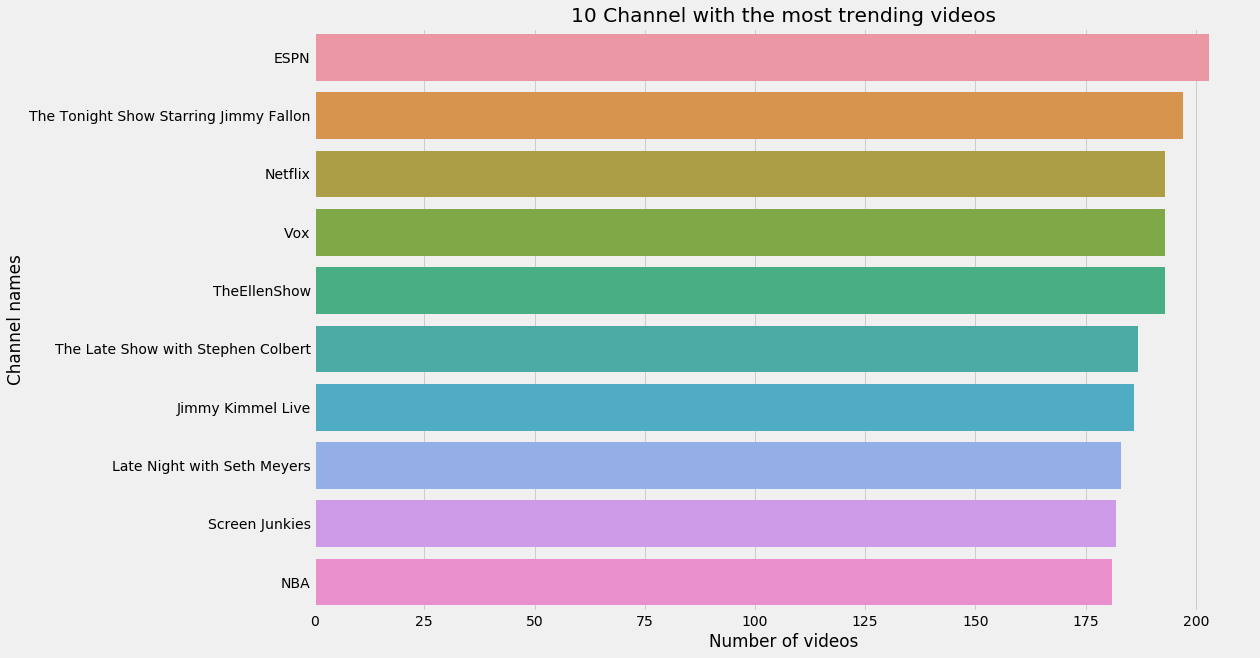

In [14]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(y=data1['index'][:10], x=data1['channel_title'][:10], data=data1, orient='h')
plt.xlabel('Number of videos')
plt.ylabel('Channel names')
plt.title('10 Channel with the most trending videos')

In [15]:
data2 = df['category_id'].value_counts().reset_index()

Text(0.5, 1.0, 'Categories of trend videos in US')

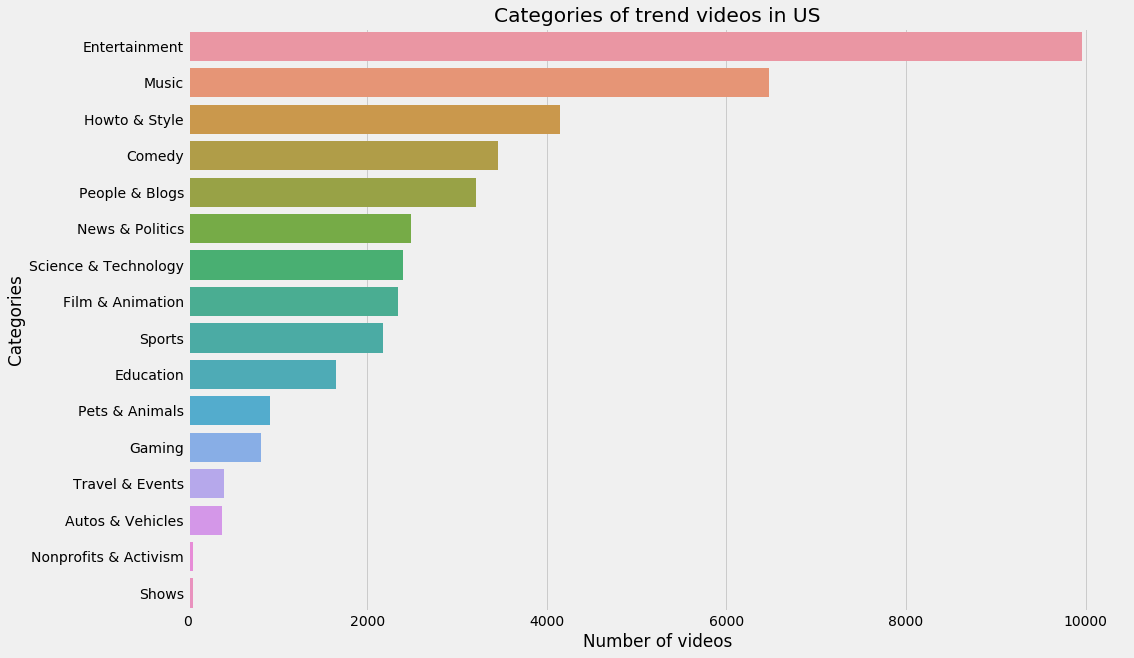

In [16]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(y=data2['index'], x=data2['category_id'], data=data1, orient='h')
plt.xlabel('Number of videos')
plt.ylabel('Categories')
plt.title('Categories of trend videos in US')

In [17]:
def convert_time(time):
    hour = time.hour
    if hour < 12:
        return 'morning'
    elif hour == 12:
        return 'noon'
    elif (hour > 12) and (hour < 18):
        return 'evening'
    else:
        return 'night'

In [18]:
data3 = df['publish_time'].map(convert_time).value_counts().reset_index()
data3 = data3.reindex([2, 3, 0, 1])

Text(0.5, 1.0, 'Publish time of trending videos in US')

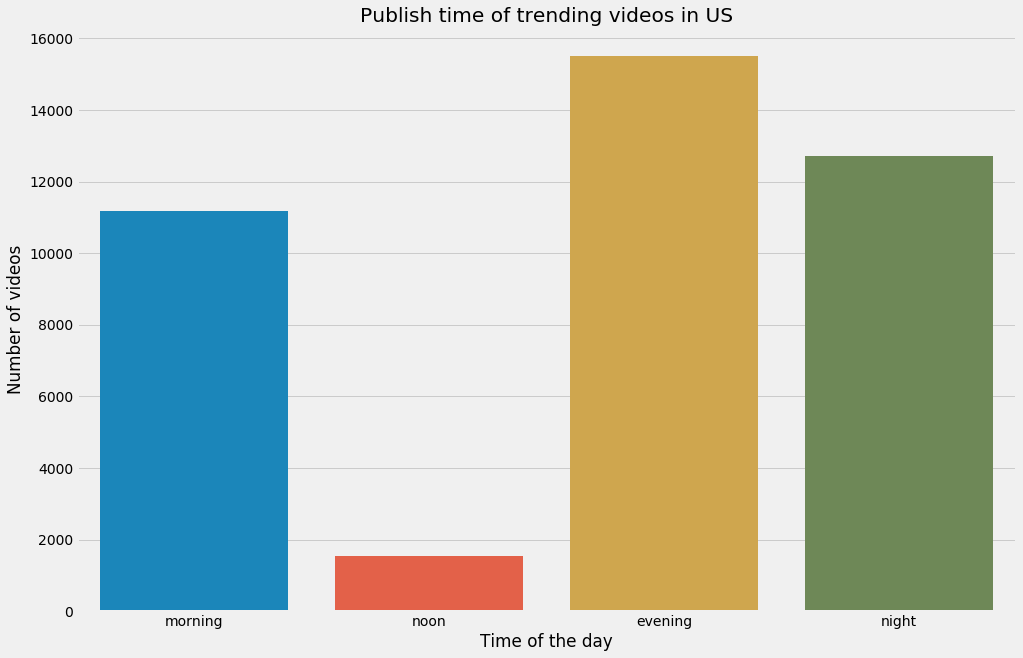

In [19]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(y=data3['publish_time'], x=data3['index'], data=data3)
plt.xlabel('Time of the day')
plt.ylabel('Number of videos')
plt.title('Publish time of trending videos in US')

In [24]:
data4 = df[['views', 'likes', 'dislikes', 'comment_count']].corr()

Text(0.5, 1, 'Correlation between views, likes, dislikes, and comments')

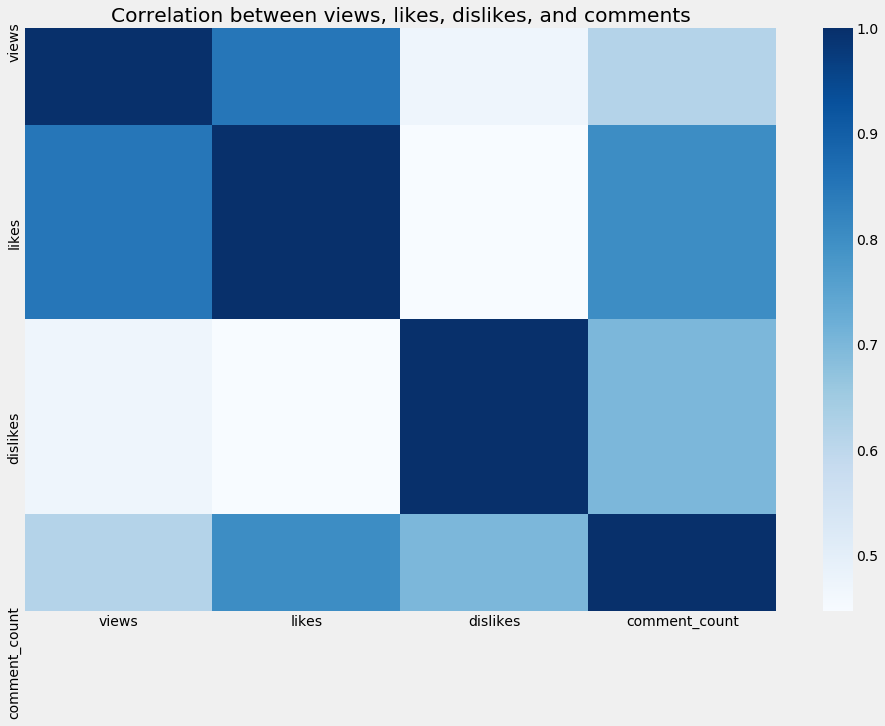

In [27]:
plt.figure(figsize=(15, 10))
sns.heatmap(data4, cmap='Blues')
plt.title('Correlation between views, likes, dislikes, and comments')

In [33]:
data5 = pd.pivot_table(df, values=['likes', 'dislikes'], index='category_id', aggfunc=np.sum)
data5['likes/dislikes'] = data5['likes']/data5['dislikes']
data5 = data5.reset_index()

Text(0.5, 1.0, 'Ratio likes/dislikes of each category')

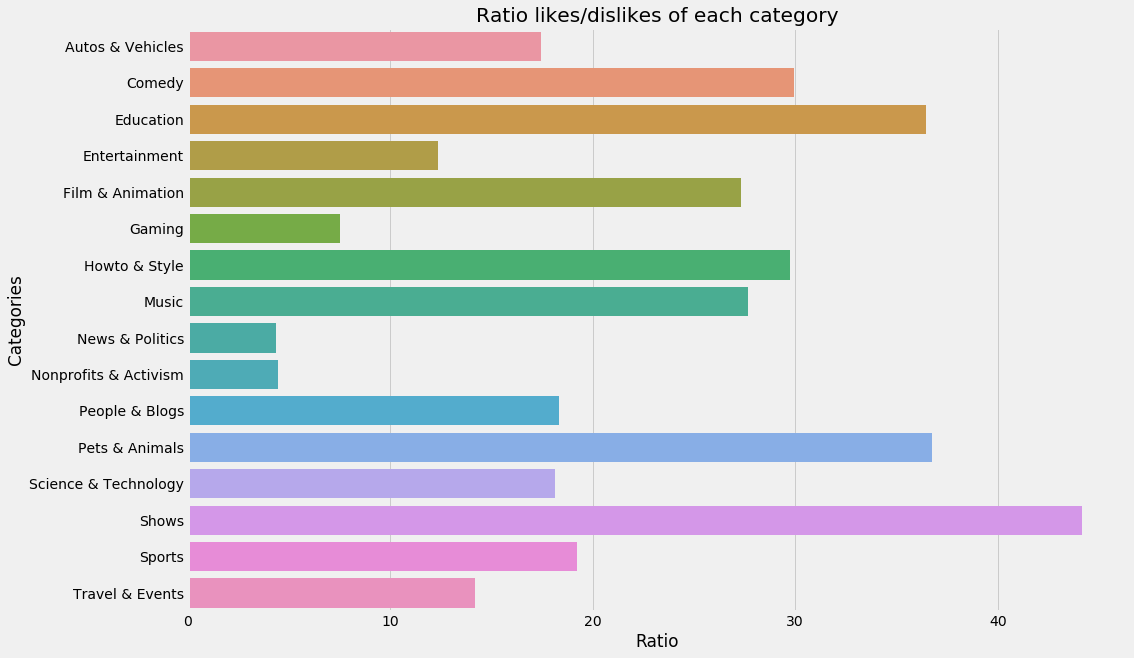

In [34]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(y=data5['category_id'], x=data5['likes/dislikes'], data=data5, orient='h')
plt.xlabel('Ratio')
plt.ylabel('Categories')
plt.title('Ratio likes/dislikes of each category')